# 1. Read in the Datset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
cdf = pd.read_csv('cleaned_ameshousing.csv')

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
cdf.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,6,141.0,31770,0,-1.0,1,0,0,1,0,0,0,0,0,0,6,5,1960,1960,0,0,0,0,0,112.0,2,2,0,2.0,3.0,0,0,639.0,4,0.0,441.0,1080.0,0,1,1,0,1656,0,0,1656,1.0,0.0,1,0,3,1,2,7,0,2,3.0,0,1960.0,2.0,2.0,528.0,2.0,2.0,0,210,62,0,0,0,0,-1.0,-1,-1,0,5,2010,0,0,215000
1,1,2,526350040,20,5,80.0,11622,0,-1.0,0,0,0,0,0,0,1,0,0,0,5,6,1961,1961,1,0,1,1,-1,0.0,2,2,0,2.0,2.0,1,1,468.0,5,144.0,270.0,882.0,0,2,1,0,896,0,0,896,0.0,0.0,1,0,2,1,2,5,0,0,-1.0,0,1961.0,0.0,1.0,730.0,2.0,2.0,1,140,0,0,0,120,0,-1.0,1,-1,0,6,2010,0,0,105000
2,2,3,526351010,20,6,81.0,14267,0,-1.0,1,0,0,1,0,0,0,0,0,0,6,6,1958,1958,0,0,2,2,2,108.0,2,2,0,2.0,2.0,1,2,923.0,4,0.0,406.0,1329.0,0,2,1,0,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,0,0,-1.0,0,1958.0,0.0,1.0,312.0,2.0,2.0,1,393,36,0,0,0,0,-1.0,-1,1,12500,6,2010,0,0,172000
3,3,4,526353030,20,6,93.0,11160,0,-1.0,0,0,0,1,0,0,0,0,0,0,7,5,1968,1968,0,0,0,3,-1,0.0,3,2,0,2.0,2.0,1,2,1065.0,4,0.0,1045.0,2110.0,0,4,1,0,2110,0,0,2110,1.0,0.0,2,1,3,1,4,8,0,2,2.0,0,1968.0,2.0,2.0,522.0,2.0,2.0,1,0,0,0,0,0,0,-1.0,-1,-1,0,4,2010,0,0,244000
4,4,5,527105010,60,6,74.0,13830,0,-1.0,1,0,0,0,0,1,0,0,0,1,5,5,1997,1998,1,0,1,1,-1,0.0,2,2,1,3.0,2.0,1,3,791.0,4,0.0,137.0,928.0,0,3,1,0,928,701,0,1629,0.0,0.0,2,1,3,1,2,6,0,1,2.0,0,1997.0,2.0,2.0,482.0,2.0,2.0,1,212,34,0,0,0,0,-1.0,1,-1,0,3,2010,0,0,189900


# 2. Surface EDA + creating subset

In [8]:
    try:
        with open('/home/charles/Documents/practice/coding_temple_repo/My-M7-Project-Home-Price-Predictions/data/DataDocumentation.txt', 'r', encoding='utf-8') as f:
            content = f.read()
            print(content)
    except UnicodeDecodeError:
        print("UTF-8 encoding failed. Trying 'latin-1'...")
        with open('/home/charles/Documents/practice/coding_temple_repo/My-M7-Project-Home-Price-Predictions/data/DataDocumentation.txt', 'r', encoding='latin-1') as f:
            content = f.read()
            print(content)
    except Exception as e:
        print(f"An error occurred: {e}")

UTF-8 encoding failed. Trying 'latin-1'...
NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessors Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessors Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
     

In [ ]:
['','','','','','','','']

<Axes: >

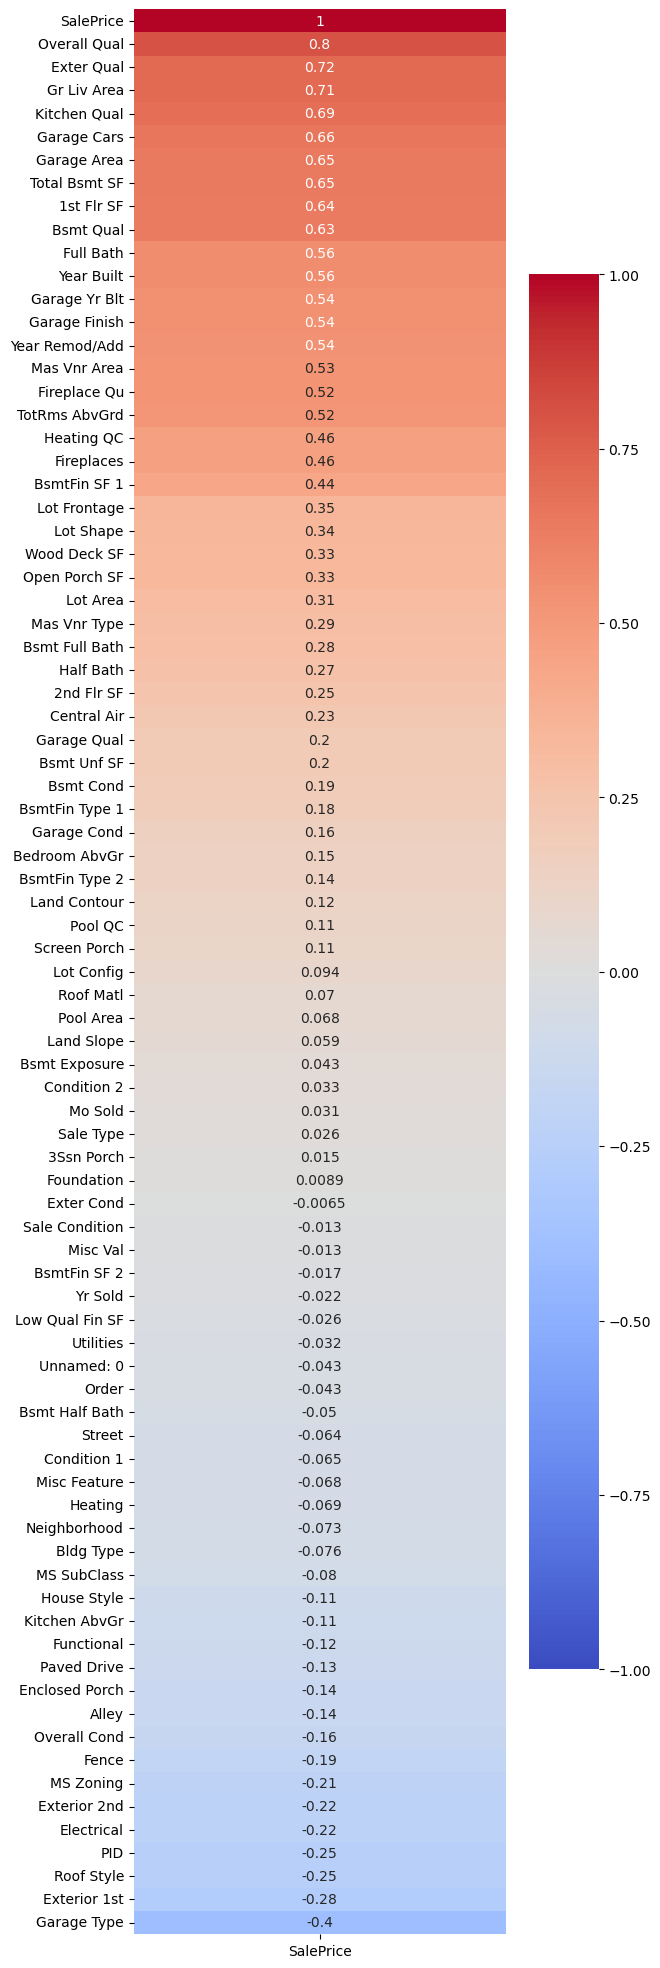

In [5]:
plt.figure(figsize=(6, 25))
sns.heatmap(cdf.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), 
           vmin= -1, 
           vmax= 1, 
           annot = True, 
           cmap = 'coolwarm')

In [6]:
sub = cdf[['SalePrice','Overall Qual','Exter Qual','Gr Liv Area','Kitchen Qual','Garage Cars','Garage Area','Total Bsmt SF']]

In [7]:
sub.to_csv('baseline_ameshousing.csv', index = False)

# 3. Reading Subset

In [3]:
df = pd.read_csv('baseline_ameshousing.csv')

In [12]:
df['Overall Qual'].value_counts()

Overall Qual
5     636
6     553
7     476
8     291
4     154
9     100
10     29
3      23
2      10
1       2
Name: count, dtype: int64

In [13]:
df['Exter Qual'].value_counts()

Exter Qual
2    1356
3     799
4     100
1      19
Name: count, dtype: int64

In [14]:
df['Gr Liv Area'].value_counts()

Gr Liv Area
864     32
1456    19
1040    18
1092    16
894     15
1200    14
987     12
816     11
936     10
1337    10
988      9
960      9
1302     9
1728     9
912      8
1218     8
1072     8
1324     8
1430     7
990      7
1604     7
1646     7
1656     7
1224     7
1358     7
1144     7
1680     6
1694     6
1652     6
1494     6
1362     6
1216     6
1792     6
1710     6
1008     6
1226     6
1422     6
1626     6
1484     6
1440     6
1479     6
1056     6
1560     6
1768     6
1316     5
1236     5
1368     5
1374     5
1501     5
1128     5
1073     5
1740     5
1314     5
1232     5
1176     5
1416     5
1838     5
1716     5
1258     5
1651     5
1504     5
882      5
1436     5
1795     5
1352     5
925      5
1709     5
1392     5
1114     5
1196     5
1536     5
1734     5
1588     5
1382     5
1668     5
1055     5
1776     4
1252     4
1052     4
848      4
1285     4
1214     4
874      4
1220     4
1718     4
1350     4
1671     4
1721     4
1664     4
1208     

In [ ]:
df['Overall Qual'].value_counts()

In [ ]:
df['Overall Qual'].value_counts()

In [ ]:
df['Overall Qual'].value_counts()

In [4]:
df.head()

,SalePrice,Overall Qual,Exter Qual,Gr Liv Area,Kitchen Qual,Garage Cars,Garage Area,Total Bsmt SF
0,215000,6,2,1656,2,2.0,528.0,1080.0
1,105000,5,2,896,2,1.0,730.0,882.0
2,172000,6,2,1329,3,1.0,312.0,1329.0
3,244000,7,3,2110,4,2.0,522.0,2110.0
4,189900,5,2,1629,2,2.0,482.0,928.0


In [24]:
df.shape

(2274, 8)

# 4. EDA on new Subset

<Axes: >

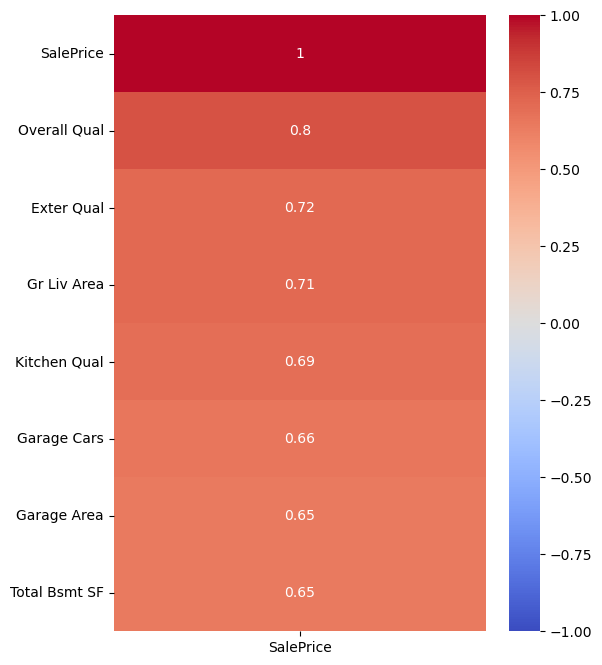

In [192]:
plt.figure(figsize=(6, 8))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), 
           vmin= -1, 
           vmax= 1, 
           annot = True, 
           cmap = 'coolwarm')

In [95]:
sns.set_style('darkgrid')

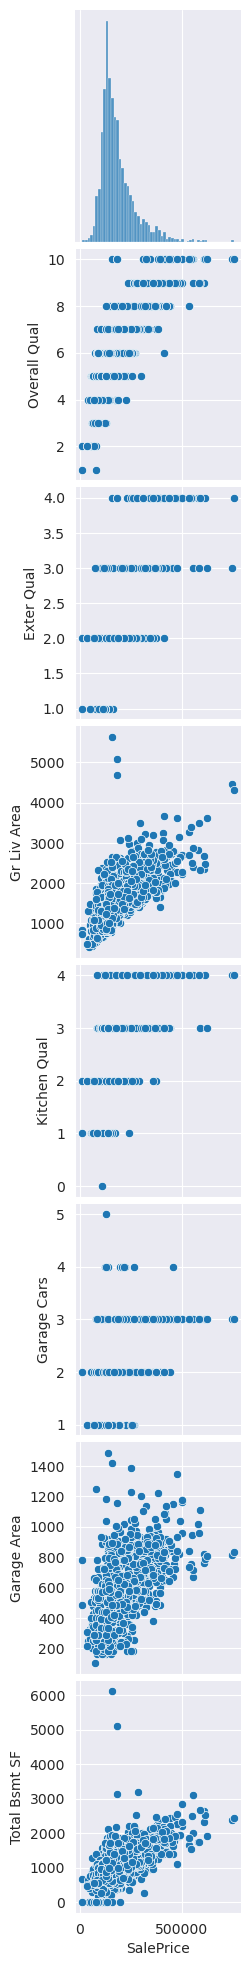

In [96]:
sns.pairplot(df, corner = True, 
            x_vars= 'SalePrice')

[Text(0, 0, '96000'),
 Text(0, 0, '138000'),
 Text(0, 0, '218689'),
 Text(0, 0, '372198')]

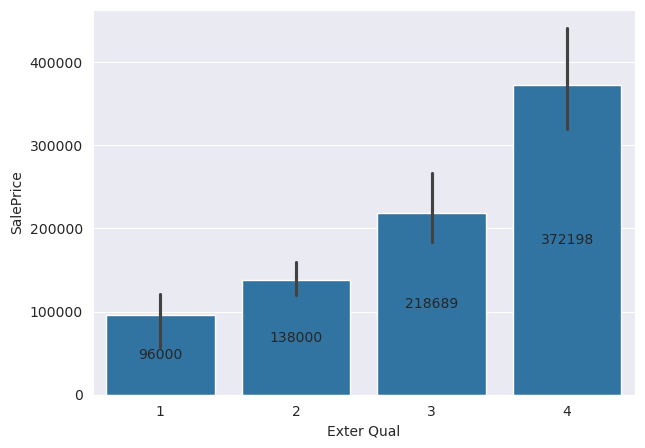

In [97]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(df, x = 'Exter Qual', y = 'SalePrice', estimator='median', errorbar =('pi', 50))
ax.bar_label(ax.containers[0], label_type='center')

[Text(0, 0, '126500'),
 Text(0, 0, '175000'),
 Text(0, 0, '301600'),
 Text(0, 0, '209200'),
 Text(0, 0, '126500')]

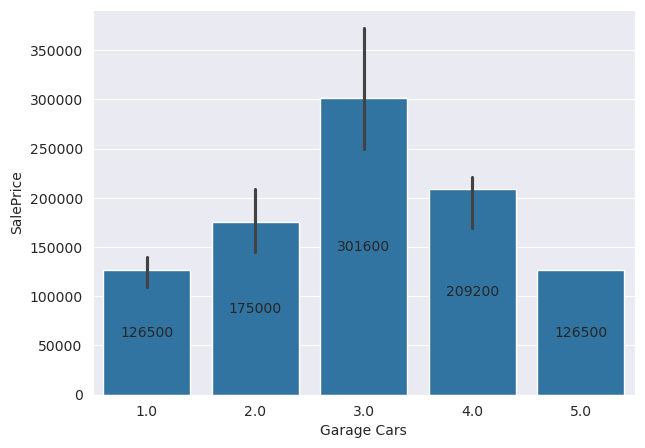

In [98]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(df, x = 'Garage Cars', y = 'SalePrice', estimator='median', errorbar =('pi', 50))
ax.bar_label(ax.containers[0], label_type='center')

[Text(0, 0, '107500'),
 Text(0, 0, '115000'),
 Text(0, 0, '135000'),
 Text(0, 0, '200662'),
 Text(0, 0, '335000')]

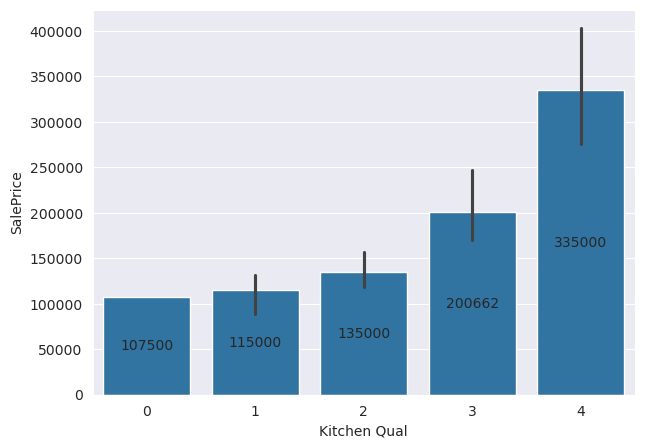

In [99]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(df, x = 'Kitchen Qual', y = 'SalePrice', estimator='median', errorbar =('pi', 50))
ax.bar_label(ax.containers[0], label_type='center')

[Text(0, 0, '47300'),
 Text(0, 0, '50750'),
 Text(0, 0, '92900'),
 Text(0, 0, '107950'),
 Text(0, 0, '133000'),
 Text(0, 0, '156500'),
 Text(0, 0, '196500'),
 Text(0, 0, '264500'),
 Text(0, 0, '369086'),
 Text(0, 0, '450000')]

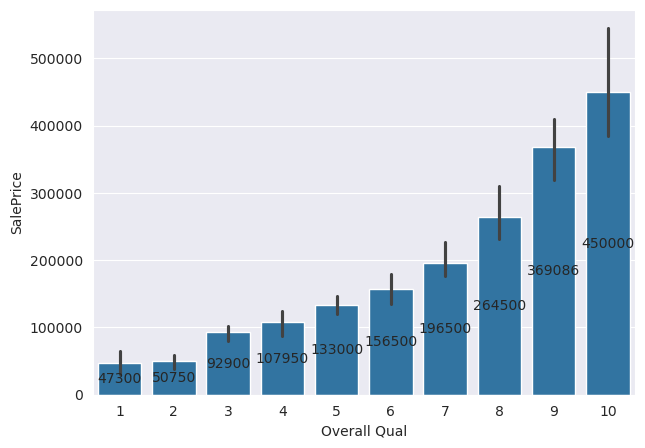

In [100]:
fig, ax = plt.subplots(figsize = (7, 5))
sns.barplot(df, x= 'Overall Qual', y='SalePrice', estimator='median', errorbar =('pi', 50))
ax.bar_label(ax.containers[0], label_type='center')

# 5. Modeling + r squared evals

In [4]:
X = df.drop(columns = 'SalePrice')

y = df['SalePrice']

In [64]:
scores = []

for i in range(20, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr.predict(X_test)
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
lr_scores = pd.DataFrame(scores)

In [65]:
lr_scores
# 0.26 test size

,i,train_score,test_score
0,20,0.806529,0.779976
1,21,0.805812,0.783693
2,22,0.805660,0.784323
3,23,0.804124,0.791590
4,24,0.802632,0.797228
5,25,0.803441,0.795202
6,26,0.801464,0.800931
7,27,0.799363,0.805983
8,28,0.799693,0.805410
9,29,0.797905,0.809205


In [37]:
scores = []

for i in range(20, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    rfr = RandomForestRegressor()
    rfr.fit(X_train, y_train)
    rfr.predict(X_test)
    train_score = rfr.score(X_train, y_train)
    test_score = rfr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
rfr_scores = pd.DataFrame(scores)

In [38]:
rfr_scores
# test size 23

,i,train_score,test_score
0,20,0.982002,0.846084
1,21,0.981483,0.848611
2,22,0.979294,0.845153
3,23,0.981481,0.855978
4,24,0.980056,0.853668
5,25,0.981882,0.823753
6,26,0.983608,0.842452
7,27,0.982838,0.836891
8,28,0.982232,0.833907
9,29,0.980692,0.839759


In [41]:
scores = []

for i in range(20, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    dtr.predict(X_test)
    train_score = dtr.score(X_train, y_train)
    test_score = dtr.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
dtr_scores = pd.DataFrame(scores)

In [42]:
dtr_scores
# test size 28

,i,train_score,test_score
0,20,0.999573,0.769857
1,21,0.999575,0.789296
2,22,0.999572,0.790639
3,23,0.999569,0.752763
4,24,0.999595,0.787102
5,25,0.999613,0.653506
6,26,0.999605,0.793212
7,27,0.999598,0.650605
8,28,0.999596,0.800105
9,29,0.999589,0.794633


In [43]:
scores = []

for i in range(20, 31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = i/100)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    knn.predict(X_test)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    scores.append({'i' : i, 'train_score' : train_score, 'test_score' : test_score})
knn_scores = pd.DataFrame(scores)

In [44]:
knn_scores
# test size 24

,i,train_score,test_score
0,20,0.823998,0.764380
1,21,0.823602,0.769677
2,22,0.823185,0.769247
3,23,0.819809,0.780955
4,24,0.816116,0.790094
5,25,0.820770,0.768091
6,26,0.820289,0.763659
7,27,0.819062,0.766044
8,28,0.821796,0.749417
9,29,0.820578,0.748179


# 6, Picking best models, models rmse vs basline rmse

## For Linear Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.26)

lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
lr_preds = lr.predict(X_test)
baseline_preds = np.full_like(y_test, y_test.mean())

In [7]:
lr.score(X_test, y_test)
# 0.800931

0.8009310817309466

In [8]:
lr_model_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(lr_model_rmse)

38578.580847134406


In [9]:
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))
print(baseline_rmse)

86465.83093025509


In [10]:
sale_mean = y_train.mean()
(lr_model_rmse / sale_mean) * 100
# NRMSE 
# RMSE score, but scaled. shows the average error of a model (my predictions are off on average by about 21.3 percent every time it makes a prediction)

np.float64(20.81875939623483)

In [11]:
mean_absolute_percentage_error(y_test, lr_preds)
# shows how far off predictions are on average (Average Magnitude of error) between the predicted and actual values
# MAE but as a percentage/scaled
# predicted values are off from their actual values by about 14.6 percent

0.14589079116749817

In [12]:
mean_absolute_percentage_error(y_test, baseline_preds)

0.3940683881037648

# pickling the lr model

In [15]:
import pickle

In [13]:
pkl_file = ''

In [16]:
with open('pkl_file', 'wb') as file:
    model = pickle.dump(lr, file)

In [17]:
with open('pkl_file', 'rb') as file:
    model = pickle.load(file)

## For Random Forest

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.23)

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
rfr_preds = rfr.predict(X_test)
baseline_preds = np.full_like(y_test, y_test.mean())

In [17]:
rfr.score(X_test, y_test)
# 0.855978
# omg, pretty consistent for a random forest regressor

0.8543808642407644

In [18]:
rfr_model_rmse = np.sqrt(mean_squared_error(y_test, rfr_preds))
print(rfr_model_rmse)

31409.52437114666


In [19]:
np.sqrt(mean_squared_error(y_test, baseline_preds))

np.float64(82309.91162711194)

In [20]:
sale_mean = y_train.mean()
(rfr_model_rmse / sale_mean) * 100

np.float64(16.936913809638142)

In [21]:
mean_absolute_percentage_error(y_test, rfr_preds)

0.11903153976510371

In [22]:
mean_absolute_percentage_error(y_test, baseline_preds)

0.3655908553066088

## For Decision Trees

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.28)

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [88]:
dtr_preds = dtr.predict(X_test)
baseline_preds = np.full_like(y_test, y_test.mean())

In [89]:
dtr.score(X_test, y_test)
# 0.800105
# question: what if there are big fluctuations within my dtr model?
# Because it is likely overfitted!
# 
# I think this might be my worst model now

0.806237728825473

In [90]:
dtr_model_rmse = np.sqrt(mean_squared_error(y_test, dtr_preds))
print(dtr_model_rmse)

37728.155361886435


In [91]:
np.sqrt(mean_squared_error(y_test, baseline_preds))

np.float64(85709.89510985615)

In [92]:
sale_mean = y_train.mean()
(dtr_model_rmse / sale_mean) * 100

np.float64(20.391962270920967)

In [93]:
mean_absolute_percentage_error(y_test, dtr_preds)

0.14859618809099426

In [94]:
mean_absolute_percentage_error(y_test, baseline_preds)

0.392074839200979

## For KNN regressor

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.24)

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [32]:
knn_preds = knn.predict(X_test)
baseline_preds = np.full_like(y_test, y_test.mean())

In [33]:
knn.score(X_test, y_test)
# 0.790094

0.7900939509062739

In [34]:
knn_model_rmse = np.sqrt(mean_squared_error(y_test, knn_preds))
print(knn_model_rmse)

38201.390864638604


In [35]:
np.sqrt(mean_squared_error(y_test, baseline_preds))

np.float64(83380.92297054172)

In [36]:
sale_mean = y_train.mean()
(knn_model_rmse / sale_mean) * 100

np.float64(20.58635944254364)

In [37]:
mean_absolute_percentage_error(y_test, knn_preds)

0.1593100062530776

In [38]:
mean_absolute_percentage_error(y_test, baseline_preds)

0.3900834775830159

# 7, which models I think are the best
1. Random Forest Regressor: really consistent for a stochastic model, different times I have ran the model have given me a r squared score of around 83 percent to 85 percent, and it has the smallest mean absolute percentage error of all the models
2. Linear Regressor: probably the second best model: good r squared score at 80 percent, similar normalized rmse to the knn regressor, but it has the edge in terms of mean absolute percentage error which is why it is the second best
3. KNearestNeighbors Regressor: the third best, r squared of 79 percent, NRMSE of 20.5 percent, and MAPE of around 16 percent
4. Decission Tree Regressor: Huge fluctuation in R squared score, from around 66 percent to 80 percent which hurts its viability, and the fluctuations carry themselves over to the other metrics as well